# Math 151B Homework No. 2
#### Brandon Loptman
#### UID: 604105043
#### January 28, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

### 1.) (a)

We want to find approximate solutions to $y' = te^{3t}-2y$ on $t \in [0,1]$ with $y(0)=0$ with $h=0.5$. Since our maximum $t$ value is 1 and $h=0.5$ we need 2 mesh points, so we set $N=2$. 

The following function performs the modified Euler method to approximate the solution to a given inital value problem.

In [2]:
def modifiedEuler(f,t_0,y_0,h,N):
    """
    """
    T = np.array([t_0 + n * h for n in range(N + 1)])
    Y = np.zeros(N+1)
    
    Y[0]= y_0
    
    for n in range(N):
        Y[n + 1] = Y[n] + (h*0.5) * (f(T[n], Y[n]) + f(T[n+1],Y[n] + h*f(T[n], Y[n])))
        
    return T,Y

In [3]:
def f1(t,y):
    return t*np.exp(3*t) - 2*y

def exactSol1(t):
    return (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)

In [4]:
T,Y = modifiedEuler(f1,t_0 = 0, y_0 = 0, h = .5, N = 2)
print("Modified Euler Approximate y(t) values:", Y)

Y_exact = exactSol1(T)
print("Exact y(t) values:", Y_exact)

Modified Euler Approximate y(t) values: [0.         0.56021113 5.3014898 ]
Exact y(t) values: [0.         0.28361652 3.21909932]


In [6]:
err = np.abs(Y-Y_exact)
print("The error at each mesh point is: ", err)

The error at each mesh point is:  [0.         0.27659461 2.08239048]


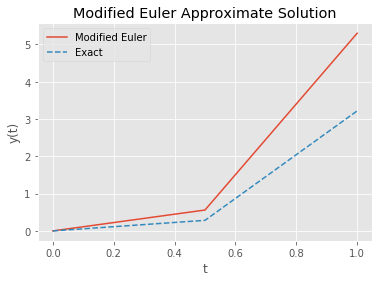

In [7]:
plt.plot(T,Y,label="Modified Euler")
plt.plot(T,Y_exact,"--",label="Exact")

plt.xlabel("t",fontsize=12)
plt.ylabel("y(t)",fontsize=12)
plt.title("Modified Euler Approximate Solution")

plt.legend()
plt.show()

### 5.) (a) 

For this problem we are approximating the solutions to the same inital value problem as before but this time using the midpoint method. 

The following function performs the midpoint method on a given inital value problem.

In [8]:
def midPoint(f,t_0,y_0,h,N):
    """
    """
    T = np.array([t_0 + n * h for n in range(N + 1)])
    Y = np.zeros(N+1)
    
    Y[0]= y_0
    
    for n in range(N):
        Y[n + 1] = Y[n] + h * f(T[n]+0.5*h,Y[n]+0.5*f(T[n],Y[n]))
        
    return T,Y

In [11]:
T,Y = midPoint(f1,t_0 = 0, y_0 = 0, h = .5, N =2)
print("Midpoint method approximate y(t): ", Y)

Midpoint method approximate y(t):  [0.         0.264625   2.70210367]


In [10]:
err = np.abs(Y-Y_exact)
print("The error at each mesh point is: ", err)

The error at each mesh point is:  [0.         0.01899152 0.51699565]


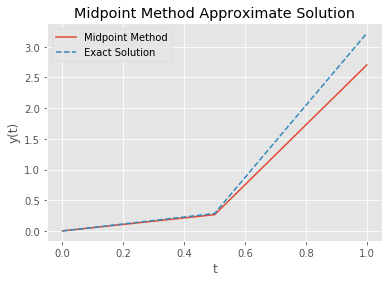

In [12]:
plt.plot(T,Y,label="Midpoint Method")
plt.plot(T,Y_exact,"--",label="Exact Solution")

plt.xlabel("t",fontsize=12)
plt.ylabel("y(t)",fontsize=12)
plt.title("Midpoint Method Approximate Solution")

plt.legend()
plt.show()

### 13.) (a) 

For this problem we are approximating the solutions to the same inital value problem as before but this time using RK4.

The following function performs RK4 on a given inital value problem.

In [13]:
def RK4(f,t_0,y_0,h,N):
    """
    """
    T = np.array([t_0 + n * h for n in range(N + 1)])
    Y = np.zeros(N+1)
    
    Y[0]= y_0
    
    for n in range(N):
        k1 = h*f(T[n],Y[n])
        k2 = h*f(T[n]+0.5*h,Y[n]+0.5*k1)
        k3 = h*f(T[n]+0.5*h,Y[n]+0.5*k2)
        k4 = h*f(T[n+1],Y[n]+k3)

        Y[n+1] = Y[n] + (1/6)*(k1+ 2*k2 + 2*k3 + k4)
        
    return T,Y

In [14]:
T,Y = RK4(f1,t_0 = 0, y_0 = 0, h = .5, N = 2)
print("RK4 approximate y(t): ", Y)

RK4 approximate y(t):  [0.         0.29699746 3.31431178]


In [15]:
err = np.abs(Y-Y_exact)
print("The error at each mesh point is: ", err)

The error at each mesh point is:  [0.         0.01338094 0.09521246]


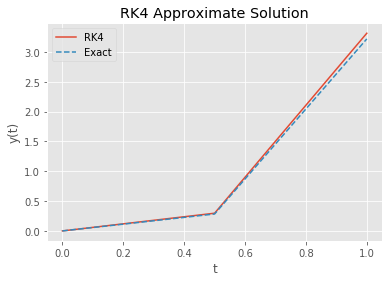

In [16]:
plt.plot(T,Y,label="RK4")
plt.plot(T,Y_exact,"--",label="Exact")

plt.xlabel("t",fontsize=12)
plt.ylabel("y(t)",fontsize=12)
plt.title("RK4 Approximate Solution")

plt.legend()
plt.show()